In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
from generic.latexify import *

In [2]:
from visualization.settings import *
from visualization.helpers import *
from visualization.paperplots_20210706 import *

In [3]:
from optimize.analyze_results import *

# Load the data

In [4]:
template = 'combined'
path = 'cached_values/outputs/organized'

In [5]:
methods = ['thiele_pav','stv', 'thiele_approvalindependent', 'thiele_squared']

In [22]:
dfs = {method:load_organized_df(path, template, method) for method in methods}

C:\Users\Nikhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3341: DtypeWarning: Columns (1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  await eval(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Nikhi\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Nikhi\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [7]:
states = dfs[methods[0]].state.unique()

In [8]:
parties = ['Republican', 'Democrat']

In [9]:
print(dfs[methods[0]].columns)

Index(['state', 'state_num', 'N_districts', 'total_voters', 'total_winners',
       'optimization', 'fraction_voters_Republican',
       'fraction_winners_Republican', 'medians', 'cohesion_income_Republican',
       'cohesion_income_Democrat', 'cohesion_income',
       'cohesion_partisan_score_Republican',
       'cohesion_partisan_score_Democrat', 'cohesion_partisan_score',
       'cohesion_education_Republican', 'cohesion_education_Democrat',
       'cohesion_education', 'cohesion_racial_Republican',
       'cohesion_racial_Democrat', 'cohesion_racial',
       'cohesion_geographic_Republican', 'cohesion_geographic_Democrat',
       'cohesion_geographic', 'N_winners_Republican'],
      dtype='object')


In [23]:
dfstvpartisan = load_organized_df(path, 'combined_partisan', 'stv')

C:\Users\Nikhi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# Proportionality stuff

In [11]:
distributions = {method: state_seat_share_distributions_nikhil(dfs[method]) for method in methods}

don't have state, skipping:  WV
don't have state, skipping:  WV
don't have state, skipping:  WV
don't have state, skipping:  WV


In [12]:
distributions

{'thiele_pav': {'AL':                                 1         2         3         4         5  \
  Most Republican          0.714286  0.714286  0.857143  0.857143  1.000000   
  Median                   0.714286  0.714286  0.714286  0.714286  0.714286   
  Most Fair in each state  0.714286  0.571429  0.571429  0.571429  0.571429   
  Most Democratic          0.714286  0.571429  0.571429  0.428571  0.571429   
  
                                  6         7  
  Most Republican          1.000000  1.000000  
  Median                   0.857143  1.000000  
  Most Fair in each state  0.714286  0.714286  
  Most Democratic          0.714286  0.714286  ,
  'AZ':                                 1         2         3         4         5  \
  Most Republican          0.555556  0.555556  0.666667  0.666667  0.666667   
  Median                   0.555556  0.555556  0.555556  0.555556  0.555556   
  Most Fair in each state  0.555556  0.555556  0.555556  0.555556  0.555556   
  Most Democratic  

In [13]:
# import pickle
# pickle.dump(distributions, open('distributions.p', 'wb'))

## Overall proportionality for each method

In [34]:
ax1 = None
fig = plt.figure(figsize = (15, 5))
for enn, method in enumerate(methods):
    if enn == 0:
        ax = plt.subplot(int('1{}{}'.format(len(methods), enn+1)))
        ax1 = ax
    else:
        ax = plt.subplot(int('1{}{}'.format(len(methods), enn+1)), sharey = ax1)
    print(method)
    _ = plot_all_state_distribution_generic(distributions[method]
                                                         , prop_val = get_prop(dfs[method])
                                                         , do_vertical_integers = True, legend = enn==len(methods)-1
                                            , ax = ax, party_colors = True, bbox_to_anchor=(-3.25, 1.055), legendncol = 4)
    ax.set_title(method_names[method], fontsize = 20)
#     plt.show()
#     axes.append(ax)
saveimage('prop_differentmethods', extension = 'pdf')

thiele_pav
stv
thiele_approvalindependent
thiele_squared


## Proportionality gap for a few relevant states

In [201]:
# # line plot for each state
# method = 'stv'
# ax1 = None
# fig = plt.figure(figsize = (12, 5))
# state_names = {}
# states_to_do= ['NY', 'FL', 'OK'] #['NY', 'MA', 'OK', 'FL', 'TX'] #dfs[method].state.unique()#
# for enn, state in enumerate(states_to_do):
#     if enn == 0:
#         ax = plt.subplot(int('1{}{}'.format(len(states_to_do), enn+1)))
#         ax1 = ax
#     else:
#         ax = plt.subplot(int('1{}{}'.format(len(states_to_do), enn+1)), sharey = ax1)
        
#     seats = state_constants[state]["seats"]
#     xbins = [x/seats for x in range(1, int(seats)+1)]
#     print(seats)
#     dfstate = {x : distributions[method][x] for x in [state]}
    
#     print(dfstate)
#     break
    
#     print(state, get_prop(dfs[method].query('state==@state')), get_prop(dfs[method].query('state==@state'))*53)
#     _ = plot_all_state_distribution_generic(dfstate
#                                             , prop_val = get_prop(dfs[method].query('state==@state'))
#                                             , xbins = xbins,  ax = ax, legend = enn==0,bbox_to_anchor=(0, 1),
#     loc="upper left")
#     ax.set_title(state_names.get(state, state), fontsize = 20)
# #    plt.show()
# saveimage('prop_states', extension = 'pdf')

In [237]:
# 4 states for main text
from visualization.fancy_plots import *
method = 'stv'
ax1 = None
fig = plt.figure(figsize = (12, 5))
state_names = {}
states_to_do= ['NY', 'MA', 'FL', 'TX'] #['NY', 'MA', 'OK', 'FL', 'TX'] #dfs[method].state.unique()#
for enn, state in enumerate(states_to_do):
    if enn == 0:
        ax = plt.subplot(int('1{}{}'.format(len(states_to_do), enn+1)))
        ax1 = ax
    else:
        ax = plt.subplot(int('1{}{}'.format(len(states_to_do), enn+1)), sharey = ax1)
        
    seats = state_constants[state]["seats"]
    xbins = [x/seats for x in range(1, int(seats)+1)]
    print(state, seats)
    dfstate = dfs[method].query('state==@state')
    
    boxplot_per_district_for_single_state_per_method(
        dfstate,
        state,
        do_extremes_and_prop_line=True,
        additional_filters={},ax = ax
    )    
    ax.set_title(state_names.get(state, state), fontsize = 20)
ax1.set_ylabel('Republican seat share', fontsize = 20)
#    plt.show()
saveimage('prop_states_boxNY', extension = 'pdf')

NY 27.0
The following are often expected to have multiple values in the same plot
N_districts     18
optimization     2
dtype: int64
MA 9.0
The following are often expected to have multiple values in the same plot
N_districts     9
optimization    2
dtype: int64
FL 27.0
The following are often expected to have multiple values in the same plot
N_districts     18
optimization     2
dtype: int64
TX 36.0
The following are often expected to have multiple values in the same plot
N_districts     21
optimization     2
dtype: int64


In [220]:
# all states for appendix
from visualization.fancy_plots import *
method = 'stv'
ax1 = None
fig = plt.figure(figsize = (24, 42))
state_names = {}
states_to_do= dfs[method].state.unique() #['NY', 'MA', 'FL', 'TX'] #['NY', 'MA', 'OK', 'FL', 'TX'] #dfs[method].state.unique()#
width = 6
height = int(np.ceil(len(states_to_do)/width))
for enn, state in enumerate(states_to_do):
    print(state, int(enn/width) + 1, width, (enn%width)+1)
#     ax = plt.subplot(int('{}{}{}'.format(int(enn/width) + 1, width, (enn%width)+1)))
    ax = plt.subplot(height,width, enn+1)

    seats = state_constants[state]["seats"]
    xbins = [x/seats for x in range(1, int(seats)+1)]
    print(state, seats)
    dfstate = dfs[method].query('state==@state')
    
    boxplot_per_district_for_single_state_per_method(
        dfstate,
        state,
        do_extremes_and_prop_line=True,
        additional_filters={},ax = ax
    )
    ax.set_xlabel('')
    ax.set_title(state_names.get(state, state), fontsize = 20)
# ax1.set_ylabel('Republican seat share', fontsize = 20)
#    plt.show()
saveimage('prop_states_all', extension = 'pdf')

AL 1 6 1
AL 7.0
The following are often expected to have multiple values in the same plot
N_districts     7
optimization    2
dtype: int64
AR 1 6 2
AR 4.0
The following are often expected to have multiple values in the same plot
N_districts     4
optimization    2
dtype: int64
AZ 1 6 3
AZ 9.0
The following are often expected to have multiple values in the same plot
N_districts     9
optimization    2
dtype: int64
CA 1 6 4
CA 53.0
The following are often expected to have multiple values in the same plot
N_districts     26
optimization     2
dtype: int64
CO 1 6 5
CO 7.0
The following are often expected to have multiple values in the same plot
N_districts     7
optimization    2
dtype: int64
CT 1 6 6
CT 5.0
The following are often expected to have multiple values in the same plot
N_districts     5
optimization    2
dtype: int64
FL 2 6 1
FL 27.0
The following are often expected to have multiple values in the same plot
N_districts     18
optimization     2
dtype: int64
GA 2 6 2
GA 14.0
The 

## Cumulative proportionality gap

In [22]:
# distributions_gaps = {}#{state:{} for method in methods}
# for state in states:
#     d = {'method': methods}
#     for method in methods:
#         prop = get_prop(dfs[method].query('state==@state'))
#         vals= (distributions[method][state] - prop).abs().loc['Most Fair in each state']
#         for i in vals.index:
#             if i == 1: continue
#             d[i] = d.get(i,[]) + [vals[i]]
#     distributions_gaps[state] = pd.DataFrame(d).set_index('method')
# plot_all_state_distribution_generic(
#     distributions_gaps, prop_val=None, do_vertical_integers=False
#     , ymin=None, ymax=None, xbins=None, legend=True, xlabel="Cumulative proportionality gap", do_zoom = True
# )

In [21]:
# distributions_gaps = {}#{state:{} for method in methods}
# methodstodo = [x for x in methods if x!='thiele_approvalindependent']
# for state in states:
#     d = {'method': methodstodo}
#     for method in methodstodo:
#         prop = get_prop(dfs[method].query('state==@state'))
#         vals= (distributions[method][state] - prop).abs().loc['Most Fair in each state']
#         for i in vals.index:
#             d[i] = d.get(i,[]) + [vals[i]]
#     distributions_gaps[state] = pd.DataFrame(d).set_index('method')
# plot_all_state_distribution_generic(
#     distributions_gaps, prop_val=None, do_vertical_integers=False
#     , ymin=None, ymax=None, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False
# )

In [45]:
# re-orienting it so each line is a method, not min/max/median/most fair
def get_proportionality_gaps(optimization = 'Most Fair in each state', get_max_instead = False):
    distributions_gaps = {}#{state:{} for method in methods}
    for state in states:
        d = {'method': [method_names[met] for met in methods]}
        for method in methods:
            prop = get_prop(dfs[method].query('state==@state'))
            if not get_max_instead:
                vals= (distributions[method][state] - prop).abs().loc[optimization]
            else:
                vals= (distributions[method][state] - prop).abs().max(axis = 0)
            for i in vals.index:
                d[i] = d.get(i,[]) + [vals[i]]
        distributions_gaps[state] = pd.DataFrame(d).set_index('method')
    return distributions_gaps


In [48]:
distributions_gaps = get_proportionality_gaps(optimization = 'Most Fair in each state')
_ = plot_all_state_distribution_generic(
    distributions_gaps, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.10, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,
    loc="lower left",
)
saveimage('prop_gap', extension = 'pdf')

In [49]:
distributions_gaps_median = get_proportionality_gaps(optimization = 'Median')

In [72]:
distributions_gaps_max = get_proportionality_gaps(optimization = '', get_max_instead = True)

In [51]:
distributions_gaps_rep = get_proportionality_gaps(optimization = 'Most Republican')
distributions_gaps_dem = get_proportionality_gaps(optimization = 'Most Democratic')

In [245]:
fig = plt.figure(figsize = (18, 5))
ax = plt.subplot(1,3, 1)
_ = plot_all_state_distribution_generic(
    distributions_gaps_median, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.3, xbins=None, legend=False, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False, ax = ax,
    loc="lower left",
)
ax.set_title('Median maps', fontsize = 20)
ax = plt.subplot(1,3, 2)
_ = plot_all_state_distribution_generic(
    distributions_gaps_rep, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.3, xbins=None, legend=False, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,ax = ax,
    loc="lower left",
)
ax.set_title('Most Republican maps', fontsize = 20)
ax = plt.subplot(1,3, 3)
_ = plot_all_state_distribution_generic(
    distributions_gaps_dem, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.3, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,ax = ax,
    loc="lower left",
)
ax.set_title('Most Democratic maps', fontsize = 20)
saveimage('prop_gap_medianrepdem', extension = 'pdf')

In [235]:
_ = plot_all_state_distribution_generic(
    distributions_gaps_median, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.3, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .6),do_broken_axes = False,
    loc="lower left",
)
saveimage('prop_gap_median', extension = 'pdf')

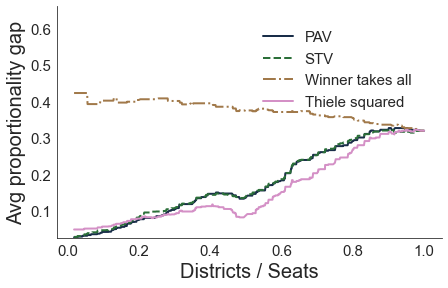

In [169]:
#Proportionality gap by the maximum gerrymanderes
_ = plot_all_state_distribution_generic(
    distributions_gaps_max, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.6, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .5),do_broken_axes = False,
    loc="lower left",
)
saveimage('prop_gap_maxgerrymandered', extension = 'pdf')
_ = plot_all_state_distribution_generic(
    distributions_gaps_max, prop_val=None, do_vertical_integers=False
    , ymin=None, ymax=.6, xbins=None, legend=True, xlabel="Avg proportionality gap", do_zoom = False,
    bbox_to_anchor=(0.5, .5),do_broken_axes = False,#ncols = 2,
    loc="lower left",
)

# diffusion stuff -- scatterplots

In [91]:
def get_gap_per_state_at_SMD(distributions_gaps, method = 'STV', which = -1): #which=-1 means SMD, which = 0 = MMD
    vals = {}
    for state in distributions_gaps:
        vals[state] = distributions_gaps[state].loc[method].tolist()[which]
    return vals

def get_gap_per_state_at_middle(distributions_gaps, method = 'STV'):
    vals = {}
    for state in distributions_gaps:
        ar = distributions_gaps[state].loc[method].tolist()
        print(state, ar)
        vals[state] = ar[int(len(ar)/2.0)]# TODO not accurate...
    return vals

# def get_MMD_level_at_which_fair(distributions_gaps, method = 'STV', threshold = .04):
#     vals = {}
#     for state in distributions_gaps:
#         ar = distributions_gaps[state].loc[method].tolist()
#         lessthanthres = [x < threshold for x in ar]
#         #grab first value at which all values before are less than threshold
#         for en in range(len(lessthanthres)):
#             if lessthanthres[en] == False:
#                 vals[state] = ((en + 1) - 1)/float(len(lessthanthres)) #TODO this line is wrong
#                 break
#             vals[state] = 1 #even SMD works here
#     return vals

def get_MMD_level_at_which_fair(distributions_gaps, method = 'STV', extratol = 0):
    vals = {}
    for state in distributions_gaps:
        result = distributions_gaps[state].loc[method]
        gaps = result.values
        seats = result.index.values
        threshold = (1 / max(seats) / 2) + extratol
        min_ix = np.argmax((gaps <= threshold) * seats)
        vals[state] = (seats[min_ix] / max(seats)) if min_ix > 0 else -.25
    return vals

def scatterstate(xs, vals, size = None, labelsizethresh = None):
    y = [vals[state] for state in vals if state in xs]
    x = [xs[state] for state in vals if state in xs]
    if size is not None:
        sizeslist = [np.sqrt(size[state])*7 for state in vals if state in xs]
        sns.scatterplot(x, y, s = sizeslist)
    else:
        sns.scatterplot(x, y)

    if labelsizethresh is not None:
        for state in set(vals).intersection(set(xs)):
            if size[state] < labelsizethresh:
                continue
            plt.text(xs[state]+.0015, vals[state]+.03, state)
#             print(state)

In [69]:
stateseats = {state: state_constants[state]['seats'] for state in state_constants}

In [57]:
voteshares = {state: state_constants[state]['vote_share'] for state in state_constants}
distributions_gaps_median = get_proportionality_gaps(optimization = 'Median')

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


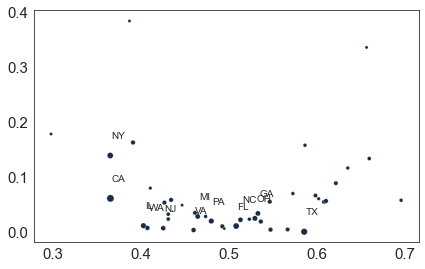

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


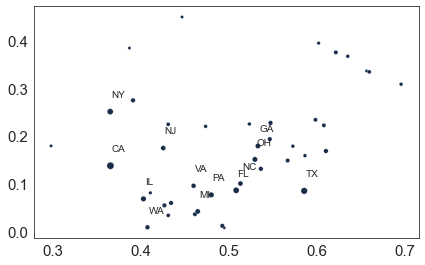

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


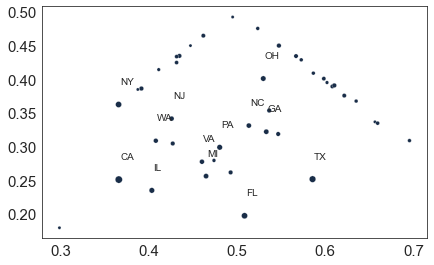

In [84]:
vals_SMD_mostfair = get_gap_per_state_at_SMD(distributions_gaps, method = 'STV')
vals_SMD_median = get_gap_per_state_at_SMD(distributions_gaps_median, method = 'STV')
vals_SMD_max = get_gap_per_state_at_SMD(distributions_gaps_max, method = 'STV')


distributions_gaps_max

scatterstate(voteshares, vals_SMD_mostfair, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_SMD_median, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_SMD_max, size = stateseats, labelsizethresh = 10)

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


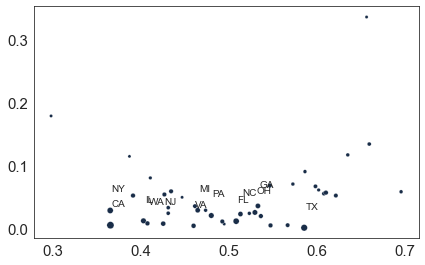

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


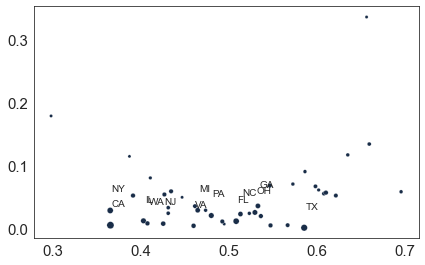

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


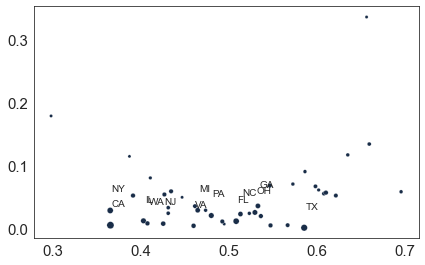

In [87]:
vals_SMD_mostfair = get_gap_per_state_at_SMD(distributions_gaps, method = 'STV', which = 0) #actually 1 large MMD
vals_SMD_median = get_gap_per_state_at_SMD(distributions_gaps_median, method = 'STV', which = 0)
vals_SMD_max = get_gap_per_state_at_SMD(distributions_gaps_max, method = 'STV', which = 0)


scatterstate(voteshares, vals_SMD_mostfair, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_SMD_median, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_SMD_max, size = stateseats, labelsizethresh = 10)

AL [0.0528714285712214, 0.0528714285712214, 0.0528714285712214, 0.0528714285712214, 0.0528714285712214, 0.0528714285712214, 0.0899857142859215]
AR [0.1175635645521087, 0.1175635645521087, 0.1175635645521087, 0.1175635645521087]
AZ [0.02025555555592018, 0.02025555555592018, 0.02025555555592018, 0.02025555555592018, 0.02025555555592018, 0.02025555555592018, 0.02025555555592018, 0.02025555555592018, 0.02025555555592018]
CA [0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.005759433961333049, 0.04349528301793687, 0.0623632075462387]
CO [0.

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


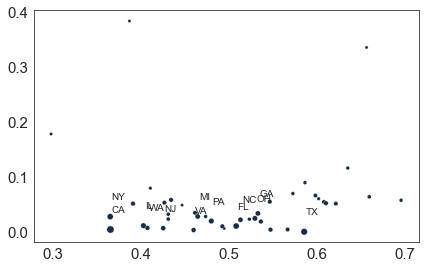

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


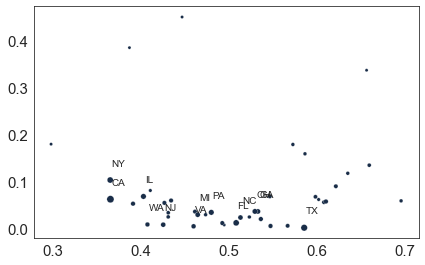

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


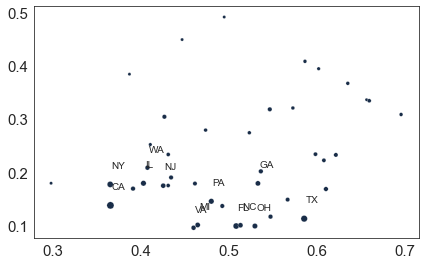

In [92]:
vals_SMD_mostfair = get_gap_per_state_at_middle(distributions_gaps, method = 'STV') 
vals_SMD_median = get_gap_per_state_at_middle(distributions_gaps_median, method = 'STV')
vals_SMD_max = get_gap_per_state_at_middle(distributions_gaps_max, method = 'STV')


scatterstate(voteshares, vals_SMD_mostfair, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_SMD_median, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_SMD_max, size = stateseats, labelsizethresh = 10)

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


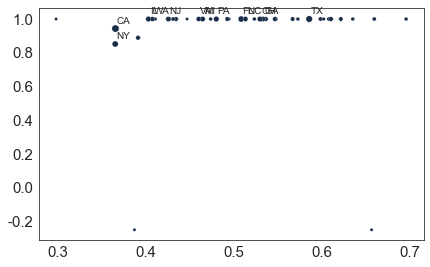

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


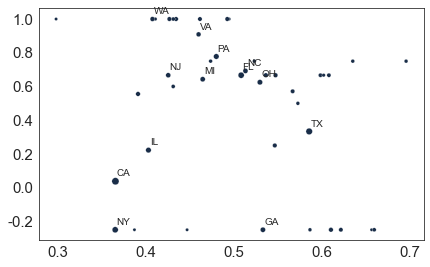

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


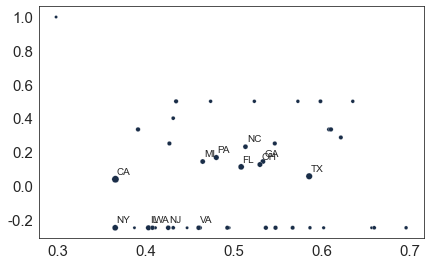

In [83]:
vals_MMD_mostfair = get_MMD_level_at_which_fair(distributions_gaps, method = 'STV', extratol = .05)#, threshold = .015)
vals_MMD_median = get_MMD_level_at_which_fair(distributions_gaps_median, method = 'STV', extratol = 0)#, threshold = .06)
vals_MMD_mostgap = get_MMD_level_at_which_fair(distributions_gaps_max, method = 'STV', extratol = .025)#, threshold = .06)


scatterstate(voteshares, vals_MMD_mostfair, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_MMD_median, size = stateseats, labelsizethresh = 10)
plt.show()
scatterstate(voteshares, vals_MMD_mostgap, size = stateseats, labelsizethresh = 10)
plt.show()

In [199]:
# vals_MMD_mostgerry = get_MMD_level_at_which_fair(distributions_gaps_max, method = 'STV', threshold = .3)
# scatterstate(voteshares, vals_MMD_mostgerry, size = stateseats, labelsizethresh = 10)
# plt.ylabel('Districts / Seats needed', fontsize = 20)
# plt.xlabel('Republican vote share', fontsize = 20)
# sns.despine()
# # saveimage('Design_MMDneeded_partisanlean', extension = 'pdf')

In [200]:
scatterstate(voteshares, vals_MMD_median, size = stateseats, labelsizethresh = 10)
plt.ylabel('Districts / Seats needed', fontsize = 20)
plt.xlabel('Republican vote share', fontsize = 20)
sns.despine()
saveimage('Design_MMDneeded_partisanlean_Median', extension = 'pdf')

C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NJ
WA
PA
TX
NY
VA
FL
MI
OH
IL
CA
NC
GA


In [128]:
absvoteshares = {state: abs(.5 - voteshares[state]) for state in voteshares}

In [133]:
avg_dist_needed = {state: min(1/(vals_MMD_median[state]+.001), stateseats[state]) for state in vals_MMD_median}

In [139]:
# avg_dist_needed

In [140]:
# scatterstate(voteshares, avg_dist_needed, size = stateseats, labelsizethresh = 10)
# plt.ylabel('Districts / Seats needed', fontsize = 20)
# plt.xlabel('Partisan lean', fontsize = 20)
# sns.despine()
# # saveimage('Design_MMDneeded_partisanlean', extension = 'pdf')

PA
TX
NY
FL
OH
IL
CA


C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


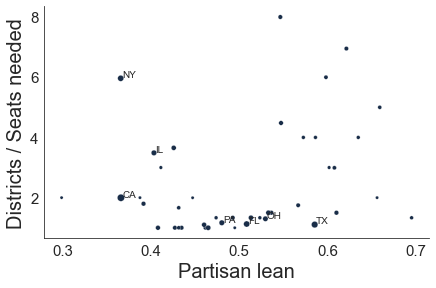

In [144]:
scatterstate(voteshares, avg_dist_needed, size = stateseats, labelsizethresh = 15)
plt.ylabel('Districts / Seats needed', fontsize = 20)
plt.xlabel('Partisan lean', fontsize = 20)
sns.despine()
# saveimage('Design_MMDneeded_partisanlean', extension = 'pdf')

NJ
WA
PA
TX
NY
VA
FL
MI
OH
IL
CA
NC
GA


C:\Users\Nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


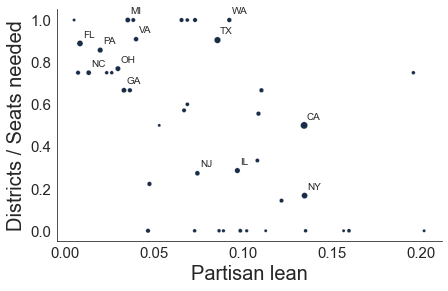

In [134]:
scatterstate(absvoteshares, vals_MMD_median, size = stateseats, labelsizethresh = 10)
plt.ylabel('Districts / Seats needed', fontsize = 20)
plt.xlabel('Partisan lean', fontsize = 20)
sns.despine()
# saveimage('Design_MMDneeded_partisanlean', extension = 'pdf')

# Intra party stuff

## Cohesion

In [24]:
def get_cohesion_df(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}"):
    parties = ['Republican','Democrat']
    party_names = {'Republican':'Republican', 'Democrat':'Democratic'}
    
    distributions_cohesion_party = {}
    for party in parties:
        distributions_cohesion_party[party] = state_seat_share_distributions_nikhil(
            dfstv, col=coltemplate.format(party), do_most_fair=False, divide=False
            , min_name="Least cohesive", max_name="Most cohesive"
        )
        
    # same plot as the methods one, except now cohesion for each party on partisan score
    distributions_partisan_cohesion = {}#{state:{} for method in methods}

    for state in states:
        d = {'party': [party_names[party] for party in parties]}
        for party in parties:
            vals =distributions_cohesion_party[party][state].loc['Median']
            for i in vals.index:
                d[i] = d.get(i,[]) + [vals[i]]
        distributions_partisan_cohesion[state] = pd.DataFrame(d).set_index('party')
    return distributions_partisan_cohesion

def plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}"
                  , cohesionlabel = 'Coalition diversity: Partisan'
                  , bbox_to_anchor=(.6,1), ax = None, do_legend = True):
    distributions_partisan_cohesion= get_cohesion_df(dfstv = dfstv, coltemplate = coltemplate)
    _ = plot_all_state_distribution_generic(
        distributions_partisan_cohesion, prop_val=None, do_vertical_integers=False
        , ymin=None, ymax=None, xbins=None, legend=do_legend, xlabel=cohesionlabel, do_zoom = False,
        bbox_to_anchor=bbox_to_anchor,do_broken_axes = False, set_ylim = False, 
        loc="upper left", party_colors = True, ax = ax
    )
    # saveimage('prop_gap', extension = 'pdf')

In [25]:
for party in parties:
    for ddd in [dfs['stv'], dfstvpartisan]:
        for cohesion in ["partisan_score", "education", "income"]:
            print(cohesion, party)
            col = "cohesion_{}_{}".format(cohesion, party)
            ddd.loc[:,col] = (-ddd.loc[:,col]).apply(np.sqrt)
        
        for cohesion in ["geographic"]:
            print(cohesion, party)
            col = "cohesion_{}_{}".format(cohesion, party)
            ddd.loc[:,col] = -ddd.loc[:,col]/1000
# dfs['stv']

partisan_score Republican
education Republican
income Republican
geographic Republican
partisan_score Republican
education Republican
income Republican
geographic Republican
partisan_score Democrat
education Democrat
income Democrat
geographic Democrat
partisan_score Democrat
education Democrat
income Democrat
geographic Democrat


C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


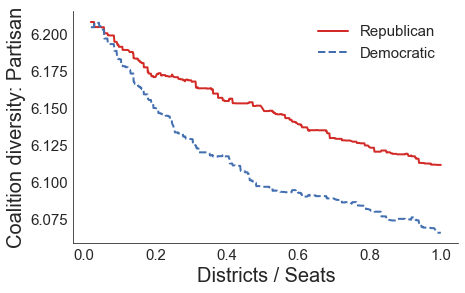

In [26]:
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}")

C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


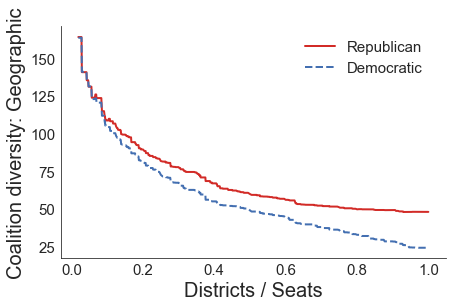

In [27]:
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_geographic_{}", cohesionlabel = 'Coalition diversity: Geographic')

Save plot when ranking second by partisan

In [28]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(1,2, 1)
plot_cohesion(dfstv = dfstvpartisan, coltemplate = "cohesion_partisan_score_{}"
              , ax = ax, cohesionlabel = 'Coalition diversity', do_legend = False)
ax.set_title('Partisan diversity', fontsize = 20)
ax = plt.subplot(1,2, 2)
plot_cohesion(dfstv = dfstvpartisan, coltemplate = "cohesion_geographic_{}"
              , cohesionlabel = 'Coalition diversity (km)', ax = ax)
ax.set_title('Geographic diversity', fontsize = 20)
saveimage('cohesion_whenrankpartisan_both', extension = 'pdf')

C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


Save plot when ranking by goegraphy

In [30]:
fig = plt.figure(figsize = (12, 5))
ax = plt.subplot(1,2, 1)
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_partisan_score_{}"
              , ax = ax, cohesionlabel = 'Coalition diversity', do_legend = False)
ax.set_title('Partisan diversity', fontsize = 20)
ax = plt.subplot(1,2, 2)
plot_cohesion(dfstv = dfs['stv'], coltemplate = "cohesion_geographic_{}"
              , cohesionlabel = 'Coalition diversity (km)', ax = ax)
ax.set_title('Geographic diversity', fontsize = 20)
saveimage('cohesion_whenrankgeog_both', extension = 'pdf')

C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


In [19]:
# plot_cohesion(dfstv = dfstvpartisan, coltemplate = "cohesion_partisan_score_{}")
# saveimage('cohesion_partisan_whenrankpartisan', extension = 'pdf')

In [20]:
# plot_cohesion(dfstv = dfstvpartisan, coltemplate = "cohesion_geographic_{}", cohesionlabel = 'Coalition diversity: Geographic')
# saveimage('cohesion_geographic_whenrankpartisan', extension = 'pdf')

## Use medians -- intra-party winner diversity

In [31]:
def deal_with_medians(df):
    df.loc[:,'medians'] = df.medians.apply(eval)
    return df

def add_intraparty_variances(df):
    def fun_rep (x):
        part = [y for y in x if y <=50]
        if len(part) == 0: return np.nan
        return np.std(part)
    def fun_dem (x):
        part = [y for y in x if y >50]
        if len(part) == 0: return np.nan
        return np.std(part)
    
    df['Republican_variance'] = df.medians.apply(fun_rep)
    df['Democrat_variance'] = df.medians.apply(fun_dem)    
    return df

In [32]:
dfstvpartisan = deal_with_medians(dfstvpartisan)

In [33]:
dfstvpartisan = add_intraparty_variances(dfstvpartisan)

In [39]:
plot_cohesion(dfstv = dfstvpartisan, coltemplate = "{}_variance", bbox_to_anchor=(.6,1)
              , cohesionlabel = 'Intra-Party diversity: Partisan')
saveimage('winnerdiversity_partisan_whenrankpartisan', extension = 'pdf')

don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI


In [ ]:
dfs['stv'] = deal_with_medians(dfs['stv'])
dfs['stv'] = add_intraparty_variances(dfs['stv'])

In [40]:
plot_cohesion(dfstv = dfs['stv'], coltemplate = "{}_variance", bbox_to_anchor=(.4,.8)
             , cohesionlabel = 'Intra-Party diversity: Partisan')
saveimage('winnerdiversity_partisan_whenrankgeo', extension = 'pdf')

C:\Users\Nikhi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


don't have state, skipping:  WV
don't have state, skipping:  WV
skipping state bc nan:  HI
skipping state bc nan:  ID
skipping state bc nan:  OK
skipping state bc nan:  RI
